<a href="https://colab.research.google.com/github/Shanabunga/EdmontonEdibleFruitTree/blob/main/Edmonton_Edible_Fruit_Tree_Project_EDA_%26_Data_Vizipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
## Project Overview

#This repository contains the work conducted for the Edmonton Edible Tree Project, focusing on the management of edible fruit trees within urban areas of the City of Edmonton, Alberta, Canada.
#The project aims to promote sustainability, livability, and community engagement through the cultivation and utilization of urban edible forests.

## Data Source

#The dataset utilized for this project is the "Edible Fruit Trees" dataset provided by the City of Edmonton through its open data portal.
#The dataset contains valuable information, including tree trunk diameter, tree health, types of edible trees, and their geographical locations.
      #**Data Source:** [City of Edmonton Open Data Portal](https://data.edmonton.ca/)
-     #**Dataset Last Updated:** June 26, 2023

## Data Exploration and Visualization

#The project includes various data visualizations using Python libraries like Matplotlib and Seaborn.
#Exploratory Data Analysis (EDA) and visualization techniques are employed to convey key insights and findings.
#Further visualizations can be found on my public Tableau account: https://public.tableau.com/app/profile/shannon.wilson5911/viz/EdmontonEdibleFruitTreeProjectFinal/Story1

#Links to the Executive Summary, Personas, EDA and Final review doc can be found:https://github.com/Shanabunga/EdmontonEdibleFruitTree/blob/main/Edmonton%20Edible%20Tree%20Summary%2C%20Personas%2C%20EDA%2C%20%26%20Final%20Review.pdf



In [44]:
!pip install pydot_ng
!apt-get install graphviz
!pip install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


In [2]:
#basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#libraries for tree visualization
from sklearn.tree import export_graphviz
from six import StringIO
from graphviz import Source
import pydot_ng as pydot
import seaborn as sns

#functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

In [3]:
#libary for uploading files
from google.colab import files

def upload_files():
    # initiates the upload
    uploaded = files.upload()

    # verify the upload
    for fn in uploaded.keys():
        print('User uploaded file "{name}" with length {length} bytes'.format(
            name=fn, length=len(uploaded[fn])))

    # uploaded files need to be written to file to interact with them
    # as part of a file system
    for filename in uploaded.keys():
        with open(filename, 'wb') as f:
            f.write(uploaded[filename])

In [4]:
#load file
upload_files()

Saving Edible Trees Project Dataset July 2023 EDA .xlsx to Edible Trees Project Dataset July 2023 EDA .xlsx
User uploaded file "Edible Trees Project Dataset July 2023 EDA .xlsx" with length 61818015 bytes


In [5]:
#load the data frame
edmonton_df = pd.read_excel("Edible Trees Project Dataset July 2023 EDA .xlsx")

In [6]:
#EDA
edmonton_df.head()

,ID,NEIGHBOURHOOD_NAME,LOCATION_TYPE,SPECIES_BOTANICAL,SPECIES_COMMON,GENUS,SPECIES,CULTIVAR,DIAMETER_BREAST_HEIGHT,CONDITION_PERCENT,PLANTED_DATE,OWNER,Bears Edible Fruit,Type of Edible Fruit,COUNT,LATITUDE,LONGITUDE,LOCATION,Point Location
0,NaN,ANTHONY HENDAY SOUTH EAST,Park,Larix siberica,"Larch, Siberian",Larix,siberica,NaN,5,65,2022-10-14,Parks,False,NaN,1,53.438094,-113.449670,"(53.43809430918348, -113.44967032785391)",POINT (-113.44967032785391 53.43809430918348)
1,NaN,SILVER BERRY,Park,Ulmus americana Brandon,"Elm, American",Ulmus,americana,Brandon,14,65,2014-06-01,Parks,False,NaN,1,53.456553,-113.370892,"(53.45655310337804, -113.3708918375654)",POINT (-113.3708918375654 53.45655310337804)
2,NaN,EDGEMONT,Boulevard,Malus baccata Spring Snow,"Crabapple, Siberian",Malus,baccata,Spring,6,65,2022-05-31,Parks,True,Crabapple,1,53.467375,-113.682925,"(53.4673745922641, -113.68292518484552)",POINT (-113.68292518484552 53.4673745922641)
3,NaN,MAPLE,Park,Prunus maackii,"Cherry, Amur",Prunus,maackii,NaN,6,65,2023-06-09,Parks,True,Cherry,1,53.478615,-113.356599,"(53.478614635223224, -113.35659890700911)",POINT (-113.35659890700911 53.478614635223224)
4,NaN,RICHFIELD,Park,Fraxinus pennsylvanica,"Ash, Green",Fraxinus,pennsylvanica,NaN,13,65,1990-01-01,Parks,False,NaN,1,53.466040,-113.453884,"(53.4660402324524, -113.45388361971314)",POINT (-113.45388361971314 53.4660402324524)


In [7]:
#EDA info
edmonton_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430183 entries, 0 to 430182
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   ID                      385861 non-null  float64       
 1   NEIGHBOURHOOD_NAME      430183 non-null  object        
 2   LOCATION_TYPE           430183 non-null  object        
 3   SPECIES_BOTANICAL       430183 non-null  object        
 4   SPECIES_COMMON          430183 non-null  object        
 5   GENUS                   430183 non-null  object        
 6   SPECIES                 419985 non-null  object        
 7   CULTIVAR                199002 non-null  object        
 8   DIAMETER_BREAST_HEIGHT  430183 non-null  int64         
 9   CONDITION_PERCENT       430183 non-null  int64         
 10  PLANTED_DATE            430183 non-null  datetime64[ns]
 11  OWNER                   430183 non-null  object        
 12  Bears Edible Fruit      430183

In [8]:
#EDA determine nulls
null_counts = edmonton_df.isnull().sum()
print(null_counts)

ID                         44322
NEIGHBOURHOOD_NAME             0
LOCATION_TYPE                  0
SPECIES_BOTANICAL              0
SPECIES_COMMON                 0
GENUS                          0
SPECIES                    10198
CULTIVAR                  231181
DIAMETER_BREAST_HEIGHT         0
CONDITION_PERCENT              0
PLANTED_DATE                   0
OWNER                          0
Bears Edible Fruit             0
Type of Edible Fruit      381168
COUNT                          0
LATITUDE                       0
LONGITUDE                      0
LOCATION                       0
Point Location                 0
dtype: int64


In [9]:
#Edible fruit column for filtering
filter_column = 'Bears Edible Fruit'

#New df by filtering rows with True values in the specified column
edmonton_edible_df = edmonton_df[edmonton_df[filter_column] == True]

#Display new df
print(edmonton_edible_df)


              ID NEIGHBOURHOOD_NAME LOCATION_TYPE  \
2            NaN           EDGEMONT     Boulevard   
3            NaN              MAPLE          Park   
10           NaN    DESROCHERS AREA     Boulevard   
13           NaN        MAPLE RIDGE          Park   
28           NaN        MAPLE RIDGE          Park   
...          ...                ...           ...   
430116  433969.0          WESTRIDGE     Boulevard   
430123  260195.0             OXFORD          Park   
430126  499563.0      NORTH GLENORA          Park   
430127  499902.0       SILVER BERRY     Boulevard   
430181  559320.0          ROSENTHAL     Boulevard   

                       SPECIES_BOTANICAL       SPECIES_COMMON      GENUS  \
2              Malus baccata Spring Snow  Crabapple, Siberian      Malus   
3                         Prunus maackii         Cherry, Amur     Prunus   
10            Prunus virginiana Schubert          Chokecherry     Prunus   
13                    Quercus macrocarpa             Oak, B

In [10]:
#Mean & Median of Target Features
mean_value_c = edmonton_edible_df['CONDITION_PERCENT'].mean()
median_value_c = edmonton_edible_df['CONDITION_PERCENT'].median()

mean_value_d = edmonton_edible_df['DIAMETER_BREAST_HEIGHT'].mean()
median_value_d = edmonton_edible_df['DIAMETER_BREAST_HEIGHT'].median()

In [11]:
print(f"Mean {'Tree Condition Percent'}: {mean_value_c}")
print(f"Mean {'Diameter Breast Height'}: {mean_value_d}")

print(f"Median {'Tree Condition Percent'}: {median_value_c}")
print(f"Median {'Diameter Breast Height'}: {median_value_d}")

Mean Tree Condition Percent: 57.426767316127716
Mean Diameter Breast Height: 11.232194226257269
Median Tree Condition Percent: 65.0
Median Diameter Breast Height: 8.0


In [12]:
#Rank the species_common in DESC order
value_counts = edmonton_edible_df['SPECIES_COMMON'].value_counts().sort_values(ascending=False)

#Display the ranking of highest counts
print("Ranking of Highest Counts:")
for rank, (value, count) in enumerate(value_counts.iteritems(), start=1):
    print(f"Rank {rank}: {value} - Count: {count}")


Ranking of Highest Counts:
Rank 1: Oak, Bur - Count: 13050
Rank 2: Crabapple - Count: 12667
Rank 3: Chokecherry - Count: 8080
Rank 4: Crabapple, Siberian - Count: 6544
Rank 5: Cherry, Amur - Count: 2419
Rank 6: Hawthorn - Count: 2407
Rank 7: Russian Olive - Count: 1185
Rank 8: Cherry, Pin - Count: 951
Rank 9: Apple - Count: 223
Rank 10: Plum, Canada - Count: 206
Rank 11: Caragana, Upright - Count: 144
Rank 12: Pear, Ussurian - Count: 142
Rank 13: Pear - Count: 117
Rank 14: Crabapple, Plumleaf - Count: 109
Rank 15: Plum, Cherry - Count: 93
Rank 16: Juniper, Rocky Mountain - Count: 93
Rank 17: Oak, Northern Pin - Count: 91
Rank 18: Cherry, Sour - Count: 90
Rank 19: Hackberry - Count: 90
Rank 20: Cherry sp. - Count: 65
Rank 21: Hawthorn, Arnold - Count: 62
Rank 22: Oak, Pin - Count: 48
Rank 23: Oak - Count: 34
Rank 24: Coffeetree, Kentucky - Count: 29
Rank 25: Plum sp. - Count: 13
Rank 26: Hawthorn, Thornless - Count: 13
Rank 27: Oak, White - Count: 12
Rank 28: Butternut - Count: 10
Rank 

<ipython-input-12-5d2907a13bbe>:6: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rank, (value, count) in enumerate(value_counts.iteritems(), start=1):


In [13]:
#Rank the species_common in DESC order
value_counts = edmonton_edible_df['Type of Edible Fruit'].value_counts().sort_values(ascending=False)

#Display the ranking of highest counts
print("Ranking of Highest Counts:")
for rank, (value, count) in enumerate(value_counts.iteritems(), start=1):
    print(f"Rank {rank}: {value} - Count: {count}")

Ranking of Highest Counts:
Rank 1: Crabapple - Count: 19320
Rank 2: Acorn - Count: 13240
Rank 3: Chokecherry - Count: 8080
Rank 4: Cherry - Count: 3531
Rank 5: Hawthorn - Count: 2486
Rank 6: Russian Olive - Count: 1185
Rank 7: Plum - Count: 318
Rank 8: Pear - Count: 259
Rank 9: Apple - Count: 223
Rank 10: Caragana flower/pod - Count: 144
Rank 11: Juniper - Count: 93
Rank 12: Hackberry - Count: 90
Rank 13: Coffeetree pod - Count: 29
Rank 14: Butternut - Count: 10
Rank 15: Saskatoon - Count: 6
Rank 16: Walnut - Count: 1


<ipython-input-13-6c02ece1ddd4>:6: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for rank, (value, count) in enumerate(value_counts.iteritems(), start=1):


In [14]:
#Display edible trees by condition_percent
edmonton_ediblesorted_df = edmonton_edible_df.sort_values(by='CONDITION_PERCENT', ascending=False)
edmonton_ediblesorted_df.reset_index().head()

,index,ID,NEIGHBOURHOOD_NAME,LOCATION_TYPE,SPECIES_BOTANICAL,SPECIES_COMMON,GENUS,SPECIES,CULTIVAR,DIAMETER_BREAST_HEIGHT,CONDITION_PERCENT,PLANTED_DATE,OWNER,Bears Edible Fruit,Type of Edible Fruit,COUNT,LATITUDE,LONGITUDE,LOCATION,Point Location
0,147105,620661.0,THE ORCHARDS AT ELLERSLIE,Boulevard,Malus baccata,"Crabapple, Siberian",Malus,baccata,NaN,6,97,1990-06-01,Parks,True,Crabapple,1,53.406903,-113.475911,"(53.406902686793536, -113.47591126663849)",POINT (-113.47591126663849 53.406902686793536)
1,65870,620873.0,BEVERLY HEIGHTS,Park,Malus baccata Spring Snow,"Crabapple, Siberian",Malus,baccata,Spring,30,90,2008-10-01,Parks,True,Crabapple,1,53.563635,-113.407404,"(53.5636349354645, -113.40740407847885)",POINT (-113.40740407847885 53.5636349354645)
2,43746,NaN,CHAPPELLE,Boulevard,Malus x adstringens Courageous,Crabapple,Malus,x,adstringens,5,85,2019-05-30,Parks,True,Crabapple,1,53.409097,-113.584831,"(53.40909685194908, -113.58483086529031)",POINT (-113.58483086529031 53.40909685194908)
3,159278,498712.0,RIVER VALLEY MAYFAIR,Park,Malus x adstringens Thunderchild,Crabapple,Malus,x,adstringens,5,80,2014-06-01,Parks,True,Crabapple,1,53.529619,-113.548495,"(53.529619021948065, -113.54849501259791)",POINT (-113.54849501259791 53.529619021948065)
4,177582,498707.0,RIVER VALLEY MAYFAIR,Park,Malus x adstringens Thunderchild,Crabapple,Malus,x,adstringens,5,80,2014-06-01,Parks,True,Crabapple,1,53.529623,-113.548584,"(53.529623417365535, -113.54858412429044)",POINT (-113.54858412429044 53.529623417365535)


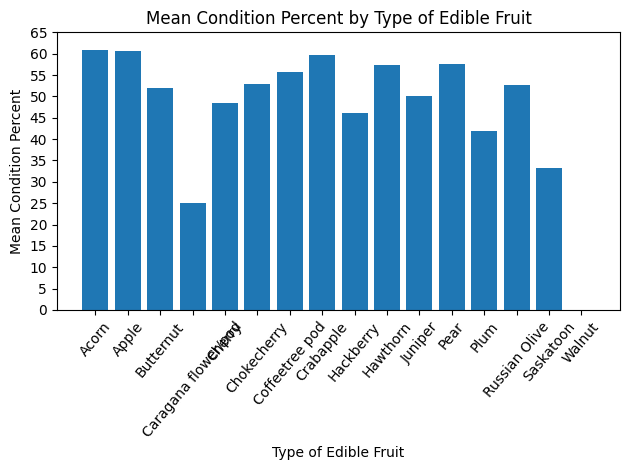

In [15]:
#Group the data by 'Type of Edible Fruit' and calculate the mean 'CONDITION_PERCENT'
fruit_condition_means = edmonton_edible_df.groupby('Type of Edible Fruit')['CONDITION_PERCENT'].mean()

#Create a bar chart
plt.bar(fruit_condition_means.index, fruit_condition_means.values)
plt.xlabel('Type of Edible Fruit')
plt.ylabel('Mean Condition Percent')
plt.title('Mean Condition Percent by Type of Edible Fruit')
plt.xticks(rotation=50)
plt.yticks(np.arange(0, 70, 5))
plt.tight_layout()
plt.show()




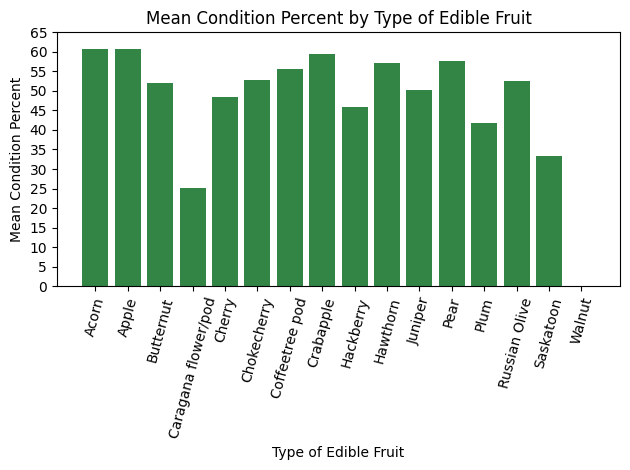

In [20]:
#Create a bar chart with green color palette
custom_palette = ["#338545"] * len(fruit_condition_means)
sns.set_palette(custom_palette)

plt.bar(fruit_condition_means.index, fruit_condition_means.values)
plt.xlabel('Type of Edible Fruit')
plt.ylabel('Mean Condition Percent')
plt.title('Mean Condition Percent by Type of Edible Fruit')
plt.xticks(rotation=75)
plt.yticks(np.arange(0, 70, 5))
plt.tight_layout()
plt.show()


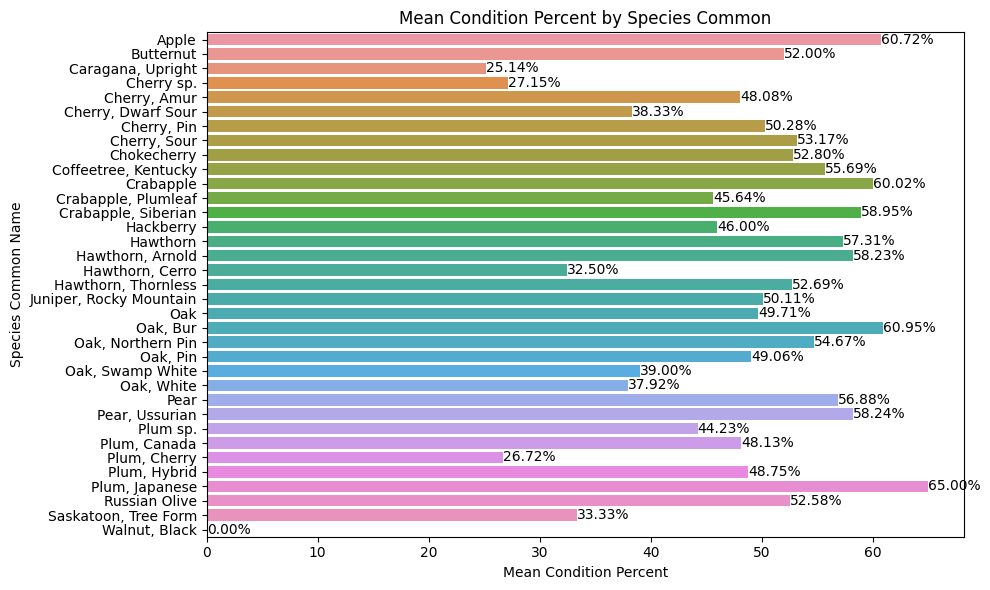

In [21]:
#Display 'SPECIES_COMMON' and calculate the mean 'CONDITION_PERCENT'
mean_condition_by_species = edmonton_edible_df.groupby('SPECIES_COMMON')['CONDITION_PERCENT'].mean().reset_index()

#Create a bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='CONDITION_PERCENT', y='SPECIES_COMMON', data=mean_condition_by_species)
ax.set(xlabel='Mean Condition Percent', ylabel='Species Common Name', title='Mean Condition Percent by Species Common')

#Add annotations with mean condition percentages
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}%', (p.get_width(), p.get_y() + p.get_height() / 2), va='center', fontsize=10)

plt.tight_layout()
plt.show()

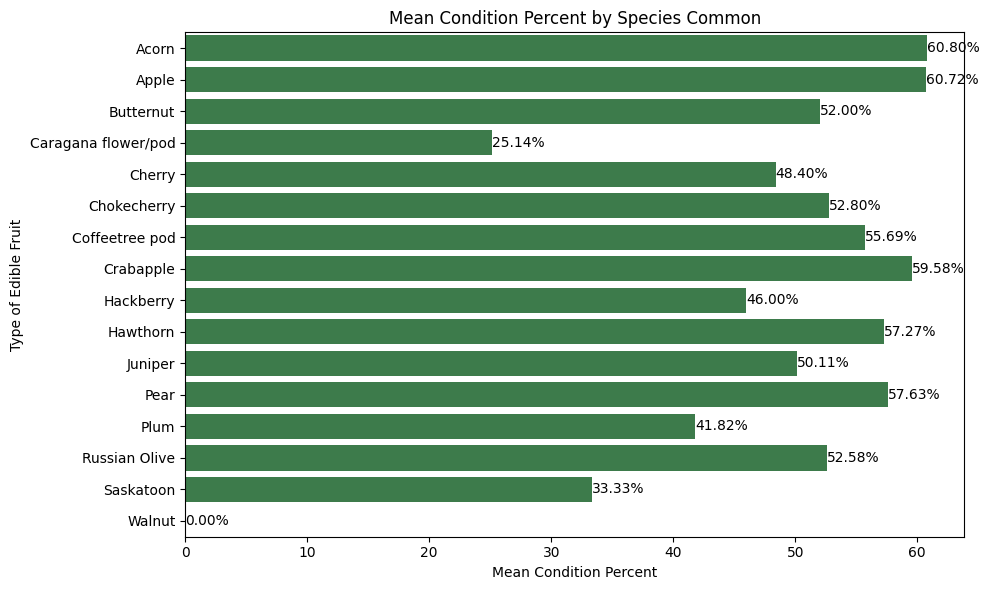

In [23]:
#Group the data Type of Edible Fruit and calculate the mean 'CONDITION_PERCENT'
mean_condition_by_species = edmonton_edible_df.groupby('Type of Edible Fruit')['CONDITION_PERCENT'].mean().reset_index()

#Create a bar chart & use green palette only
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='CONDITION_PERCENT', y='Type of Edible Fruit', data=mean_condition_by_species)
ax.set(xlabel='Mean Condition Percent', ylabel='Type of Edible Fruit', title='Mean Condition Percent by Species Common')

#Add annotations with mean condition percentages
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}%', (p.get_width(), p.get_y() + p.get_height() / 2), va='center', fontsize=10)

plt.tight_layout()
plt.show()

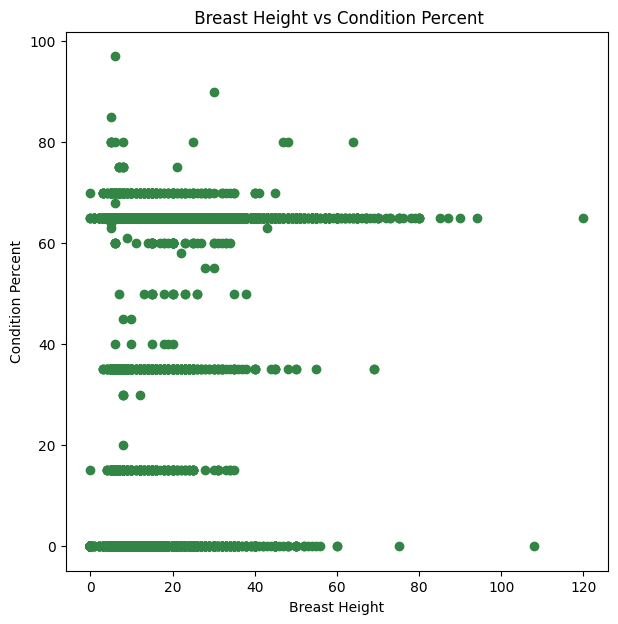

In [41]:
#scatterplot of breast height vs condition percentage of edible fruit
plt.figure(figsize=(7, 7))

plt.scatter(edmonton_edible_df.DIAMETER_BREAST_HEIGHT,
            edmonton_edible_df.CONDITION_PERCENT)

plt.title(" Breast Height vs Condition Percent")
plt.ylabel("Condition Percent")
plt.xlabel("Breast Height")

plt.show()

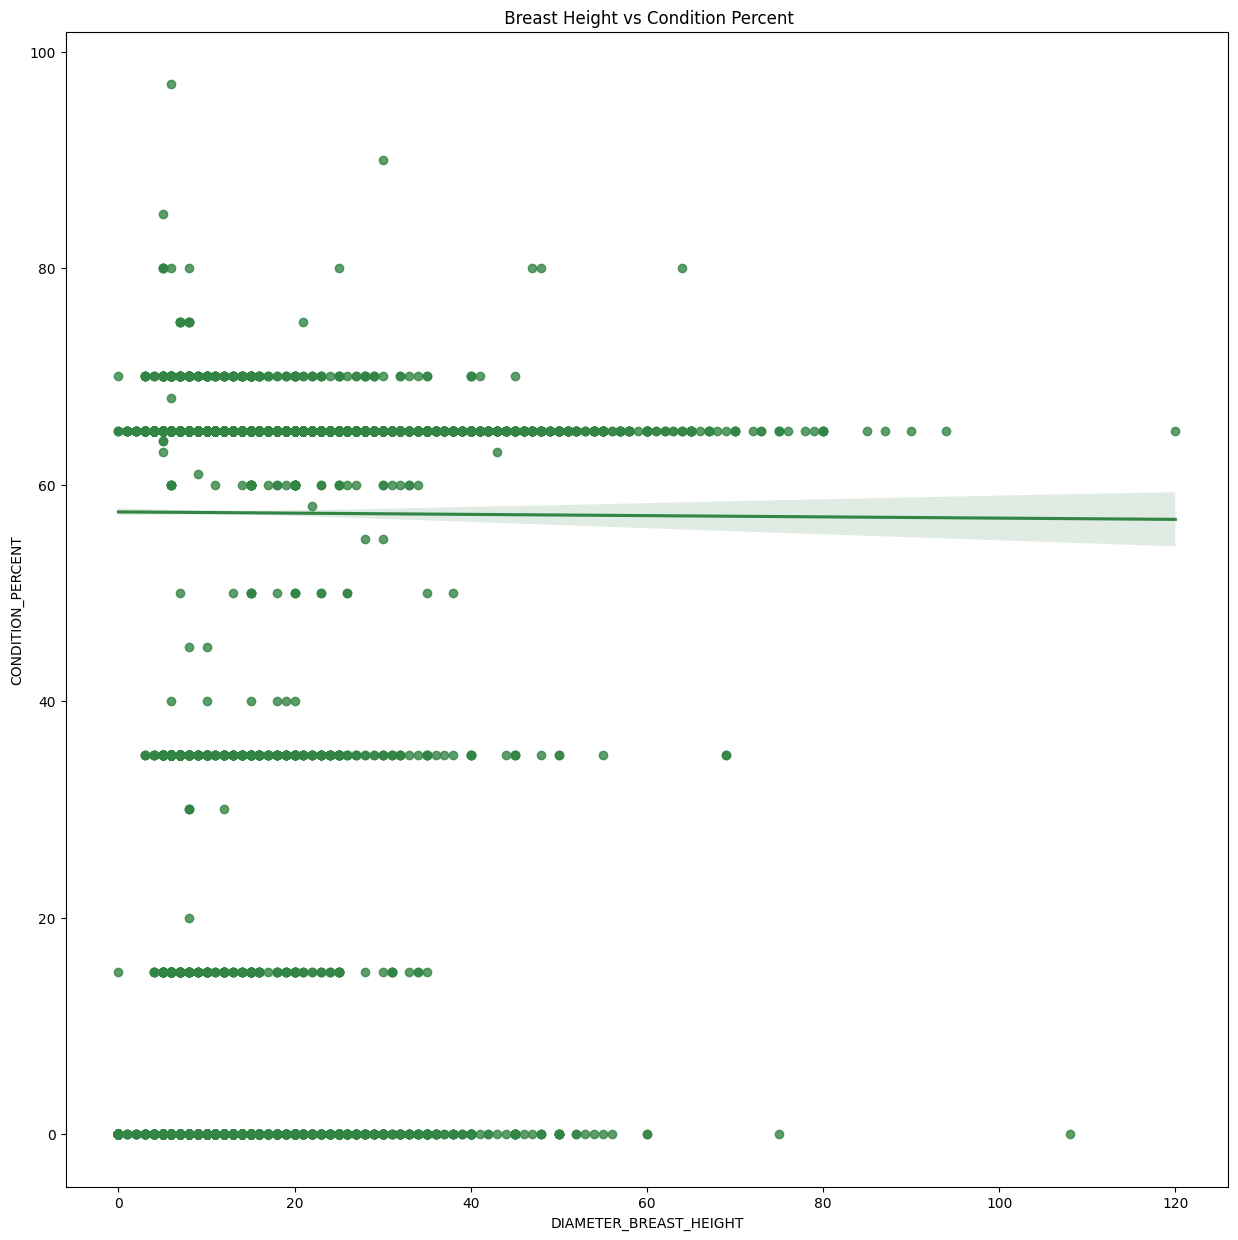

In [25]:
#scatterplot with regression line of breast height vs condition percentage of edible fruit
plt.figure(figsize=(15, 15))

sns.regplot(x="DIAMETER_BREAST_HEIGHT",
                y="CONDITION_PERCENT",
                data=edmonton_edible_df,
                fit_reg=True)

plt.title(" Breast Height vs Condition Percent")
plt.show()

<ipython-input-39-79161a109e86>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = edmonton_edible_df.corr()


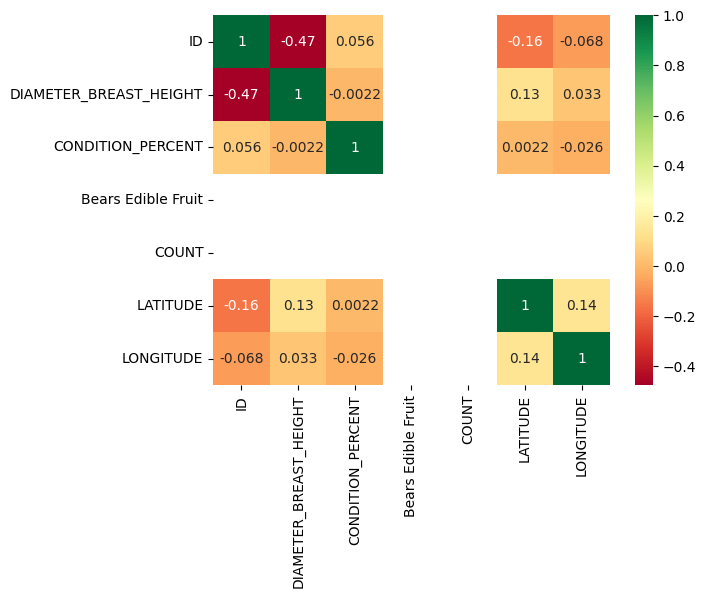

In [39]:
#Correlation matrix
correlation_matrix = edmonton_edible_df.corr()

#Heatmap to visualize correlations
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn')
plt.show()